immune cells(CD45+) from 2 orthotopic LA mouse model tumors in GSE127465.

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.8.2 anndata==0.7.8 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [4]:
raw_file = 'write_LCA/m_LCA1-2_raw.h5ad'
qc1_file = 'write_LCA/m_LCA1-2_qc1.h5ad'
filtered_file = 'write_LCA/m_LCA1-2_filtered.h5ad'
pp_file = 'write_LCA/m_LCA1-2_pp.h5ad'
results_file = 'write_LCA/m_LCA1-2.h5ad'  # the file that will store the analysis results

In [5]:
adata = sc.read_h5ad(results_file)

# Read the count matrix into an 'AnnData'

In [7]:
adatas=[]
names = ['t_1_1','t_1_2','t_1_3','t_1_4','t_1_5','t_2_1','t_2_2','t_2_3','t_2_4']
reps = ['t1']*5+['t2']*4
for i in range(0,len(names)):
    dir='../../data_LCA/ort_LCA/GSM3635'+str(309+i)+'_mouse_'+names[i]+'_raw_counts.tsv'
    adata = sc.read(
        dir,  # the directory with the `.mtx` file
        cache=True,# write a cache file for faster subsequent reading
        )  
    adata.obs['Barcode']=adata.obs_names
    adata.obs['Biological replicate']=reps[i]
    adata.obs['Library']=names[i]
    ### import metadata cell type annotation
    meta = pd.read_csv('../../data_LCA/ort_LCA/GSE127465_mouse_cell_metadata_15939x12.tsv',sep='\t')[['Tumor or healthy','Biological replicate','Library','Barcode','Most likely Immgen cell type','Major cell type','Minor subset']]
    meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]
    Imm_dict_h_LCA = dict(zip(list(meta['Barcode']),list(meta['Most likely Immgen cell type']) ))
    major_dict_h_LCA = dict(zip(list(meta['Barcode']),list(meta['Major cell type']) ))
    sub_dict_h_LCA = dict(zip(list(meta['Barcode']),list(meta['Minor subset']) ))
    list_Imm = []
    list_maj = []
    list_sub = []
    barcodes = list(adata.obs_names)
    for barcode in barcodes:
        if barcode in list(meta['Barcode']):
            list_Imm.append(Imm_dict_h_LCA[barcode])
            list_maj.append(major_dict_h_LCA[barcode])
            list_sub.append(sub_dict_h_LCA[barcode])
        else:
            list_Imm.append('null')
            list_maj.append('null')
            list_sub.append('null')
    adata.obs['Most_likely_Immgen_cell_type']=list_Imm
    adata.obs['Major_cell_type']=list_maj
    adata.obs['Minor_subset']=list_sub
    # unify barcode name
    adata.obs.index=[names[i]+'-'+x for x in adata.obs.index]
    adatas.append(adata)
                        

... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635309_mouse_t_1_1_raw_counts.h5ad


/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]


... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635310_mouse_t_1_2_raw_counts.h5ad
... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635311_mouse_t_1_3_raw_counts.h5ad


/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]


... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635312_mouse_t_1_4_raw_counts.h5ad


/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]
/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]


... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635313_mouse_t_1_5_raw_counts.h5ad
... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635314_mouse_t_2_1_raw_counts.h5ad


/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]


... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635315_mouse_t_2_2_raw_counts.h5ad


/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]


... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635316_mouse_t_2_3_raw_counts.h5ad


/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]


... reading from cache file cache/..-..-data_LCA-ort_LCA-GSM3635317_mouse_t_2_4_raw_counts.h5ad


/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]
/tmp/ipykernel_394/4178946590.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = meta[meta['Tumor or healthy']=='t'][meta['Library']==names[i]]


In [8]:
adatas

[AnnData object with n_obs × n_vars = 1558 × 28205
     obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset',
 AnnData object with n_obs × n_vars = 1145 × 28205
     obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset',
 AnnData object with n_obs × n_vars = 1163 × 28205
     obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset',
 AnnData object with n_obs × n_vars = 1548 × 28205
     obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset',
 AnnData object with n_obs × n_vars = 986 × 28205
     obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset',
 AnnData object with n_obs × n_vars = 1042 × 28205
     obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell

In [9]:
adata = ad.concat(adatas, merge = "same")

In [10]:
adata.obs

Barcode Biological replicate Library  \
t_1_1-bc0001  bc0001                   t1   t_1_1   
t_1_1-bc0002  bc0002                   t1   t_1_1   
t_1_1-bc0003  bc0003                   t1   t_1_1   
t_1_1-bc0004  bc0004                   t1   t_1_1   
t_1_1-bc0005  bc0005                   t1   t_1_1   
...              ...                  ...     ...   
t_2_4-bc1084  bc1084                   t2   t_2_4   
t_2_4-bc1085  bc1085                   t2   t_2_4   
t_2_4-bc1086  bc1086                   t2   t_2_4   
t_2_4-bc1087  bc1087                   t2   t_2_4   
t_2_4-bc1088  bc1088                   t2   t_2_4   

             Most_likely_Immgen_cell_type Major_cell_type Minor_subset  
t_1_1-bc0001        MF_Thio5_II+480int_PC         MoMacDC         Mac1  
t_1_1-bc0002            DC_103-11b+24+_Lu         MoMacDC          DC1  
t_1_1-bc0003              DC_8-4-11b+_SLN         MoMacDC          DC3  
t_1_1-bc0004                     DC_8+_Th         MoMacDC          DC1  
t_1_1-bc0005              DC_8-4-11b+_SLN         MoMacDC          DC3  
...                                   ...             ...          ...  
t_2_4-bc1084                      B_Fo_Sp         B cells      B cells  
t_2_4-bc1085                   GN_UrAc_PC     Neutrophils           N4  
t_2_4-bc1086                 GN_Arth_SynF     Neutrophils           N3  
t_2_4-bc1087                         null            null         null  
t_2_4-bc1088                     B_Fo_MLN         B cells      B cells  

[10562 rows x 6 columns]

In [11]:
adata
#del(adatas)

AnnData object with n_obs × n_vars = 10562 × 28205
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset'

In [12]:
adata.write(raw_file)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Barcode' as categorical
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Biological replicate' as categorical
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Cat

# Quality Control
doublets detected in another file, stored as qc1_file

In [13]:
adata=sc.read_h5ad(qc1_file)

In [14]:
adata

AnnData object with n_obs × n_vars = 10562 × 28205
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

#### filtering

In [15]:
# calculate qc metrics for regression
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

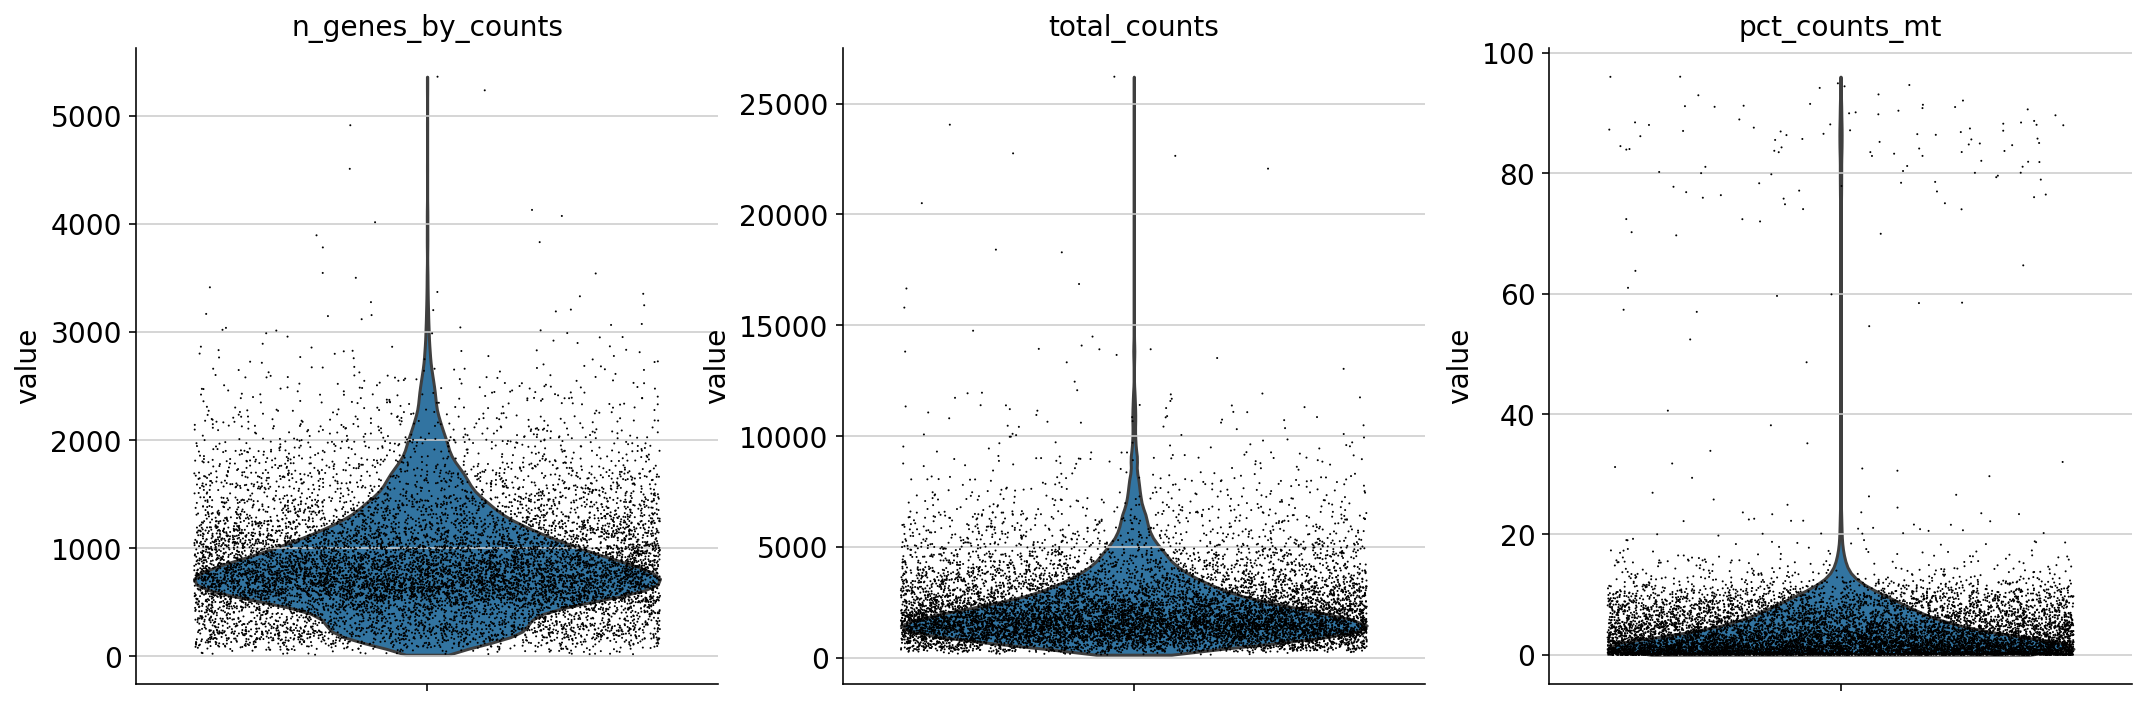

In [20]:
%matplotlib inline
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

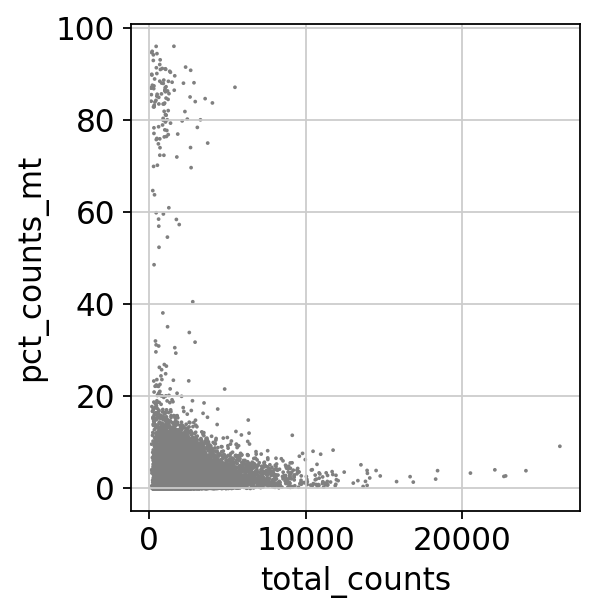

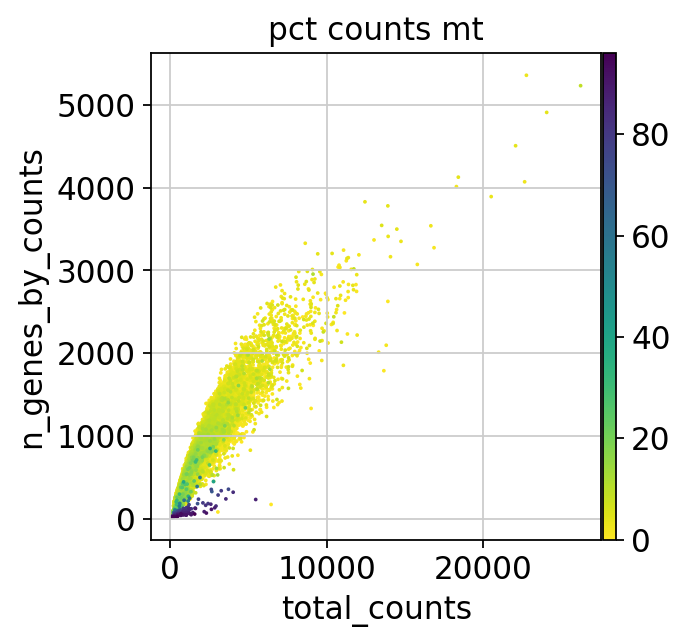

In [24]:
#%matplotlib inline
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',color='pct_counts_mt')

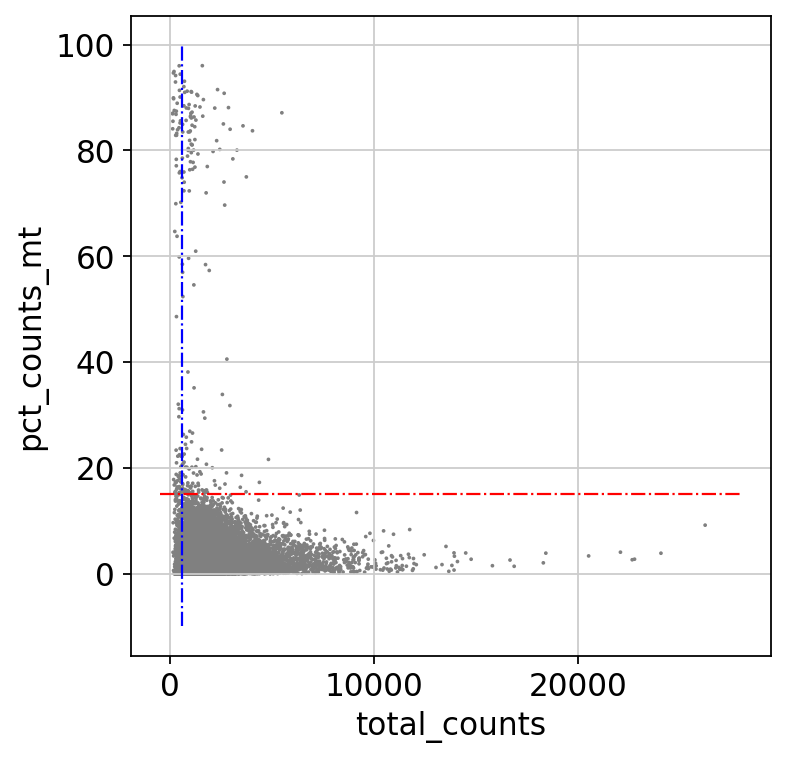

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot([600,600],[-10,100],'b-.',linewidth='1')
l2 = ax.plot([-500,28000],[15,15],'r-.',linewidth='1')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', ax=ax)

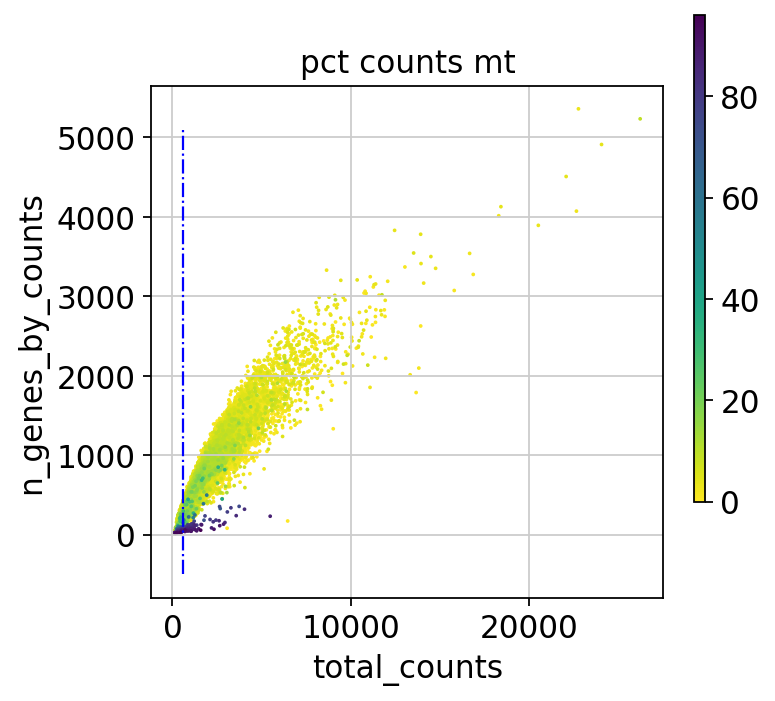

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
l1 = ax.plot([600,600],[-500,5100],'b-.',linewidth='1')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',color='pct_counts_mt',ax=ax)

Filtering method of the paper:

1. For mouse, transcriptomes with more than 600 total counts and less than 15% of counts coming from mitochondrial genes were retained.
2. more permissive filtering was necessary to i) avoid filtering out human neutrophils, that naturally have a lower mRNA content; ii) retain non-hematopoietic cells which are more sensitive to dissociation and show a higher mitochondrial gene fraction, possibly indicating premature lysis

In [16]:
adata = adata[adata.obs.total_counts >= 600, :] 
adata = adata[adata.obs.pct_counts_mt <= 15, :] 

In [17]:
adata

View of AnnData object with n_obs × n_vars = 9747 × 28205
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [18]:
adata = adata[adata.obs.predicted_doublet == False, :] 

In [19]:
adata

View of AnnData object with n_obs × n_vars = 9713 × 28205
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
adata.write(filtered_file)

In [47]:
adata=sc.read_h5ad(filtered_file)
adata

AnnData object with n_obs × n_vars = 9713 × 28205
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [5]:
## 拆分数据以便在Rstudio中import
#adata[adata.obs.batch_key == 'm_LCA1' , :].write('write_LCA/m_LCA1_filtered.h5ad')
#adata[adata.obs.batch_key == 'm_LCA2' , :].write('write_LCA/m_LCA2_filtered.h5ad')

# Import SingleR results 

In [48]:
singleR_re_1 = pd.read_csv('write_LCA/pred_m_LCA1.csv',sep=',')[['Unnamed: 0','labels']]
singleR_re_2 = pd.read_csv('write_LCA/pred_m_LCA2.csv',sep=',')[['Unnamed: 0','labels']]
singleR_re = singleR_re_1.append(singleR_re_2)
keys = []
for i in range(0,9713):
    keys.append(list(singleR_re['Unnamed: 0'])[i].split('-')[1]+'-'+list(singleR_re['Unnamed: 0'])[i].split('-')[2])
    
label_dict_m_LCA1_2 = dict(zip(keys,list(singleR_re['labels'])))

/tmp/ipykernel_394/3431658253.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  singleR_re = singleR_re_1.append(singleR_re_2)


In [42]:
#np.save('write_LCA/label_dict_m_LCA1_2',label_dict_m_LCA1_2)
label_dict_m_LCA1_2 = np.load('write_LCA/label_dict_m_LCA1_2.npy',allow_pickle=True).item()

In [49]:
list_label = []
barcodes = list(adata.obs_names)
for barcode in barcodes:
    list_label.append(label_dict_m_LCA1_2[barcode])
print(len(list_label))
adata.obs['label_singleR']=list_label

9713


In [50]:
adata.obs['label_singleR']

t_1_1-bc0001    Macrophages
t_1_1-bc0002             DC
t_1_1-bc0003             DC
t_1_1-bc0004             DC
t_1_1-bc0005             DC
                   ...     
t_2_4-bc1083        T cells
t_2_4-bc1084        B cells
t_2_4-bc1085    Neutrophils
t_2_4-bc1086    Neutrophils
t_2_4-bc1088        B cells
Name: label_singleR, Length: 9713, dtype: object

In [51]:
adata.write(filtered_file)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'label_singleR' as categorical


# Normalization
Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, so that counts become comparable among cells.

In [52]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [53]:
adata

AnnData object with n_obs × n_vars = 9713 × 28205
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

Logarithmize the data:

In [54]:
sc.pp.log1p(adata)

In [55]:
adata

AnnData object with n_obs × n_vars = 9713 × 28205
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

Identify highly-variable genes.

Method of the paper:
“FindVariableGenes” function of Seurat was used to get the variable genes with the following parameters: x.low.cutoff 0.05, x.high.cutoff 8 and y.cutoff 0.5.1226 variable genes were found as the input genes for PCA or DiffusionMap analysis

In [56]:
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=8, min_disp=0.5) 

extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [57]:
adata.var['highly_variable'].value_counts(normalize=False)

False    22750
True      5455
Name: highly_variable, dtype: int64

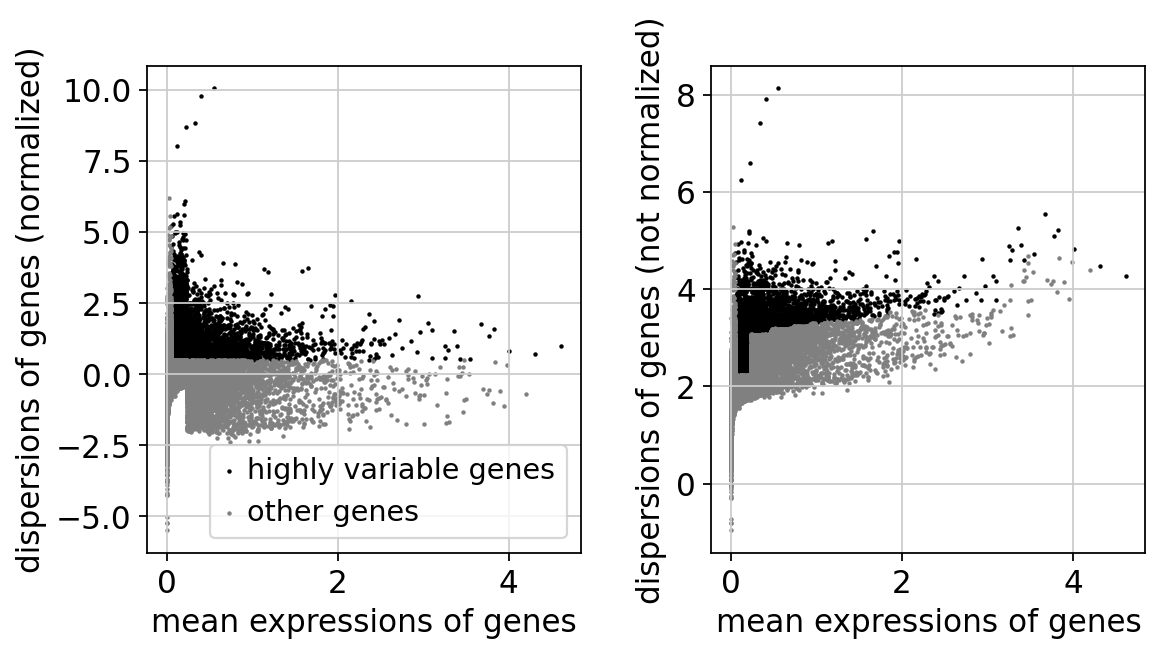

In [58]:
sc.pl.highly_variable_genes(adata)

In [59]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [60]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:56)


In [61]:
sc.pp.scale(adata, max_value=10)

# Principal component analysis

In [62]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


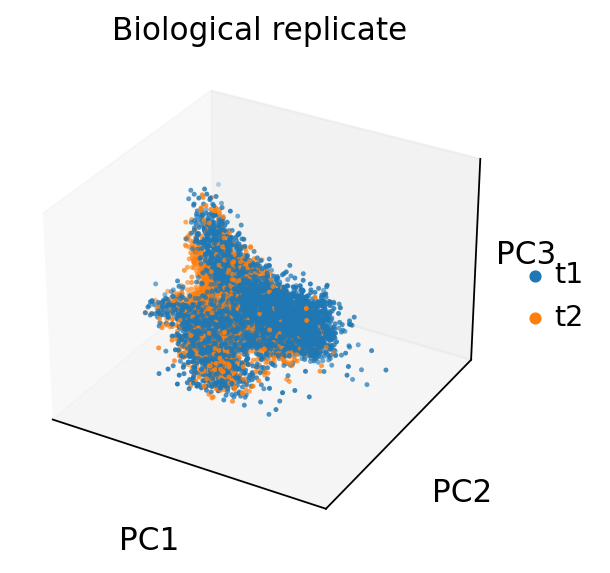

In [67]:
sc.pl.pca(adata, color='Biological replicate', projection='3d')

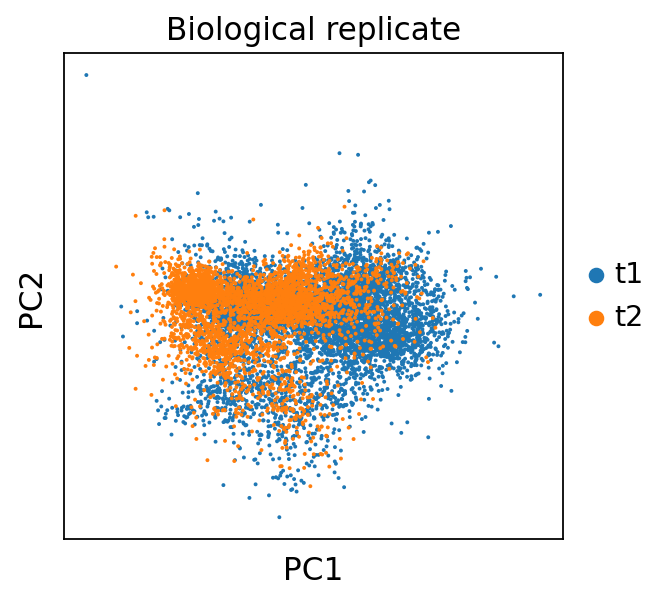

In [66]:
sc.pl.pca(adata, color='Biological replicate')

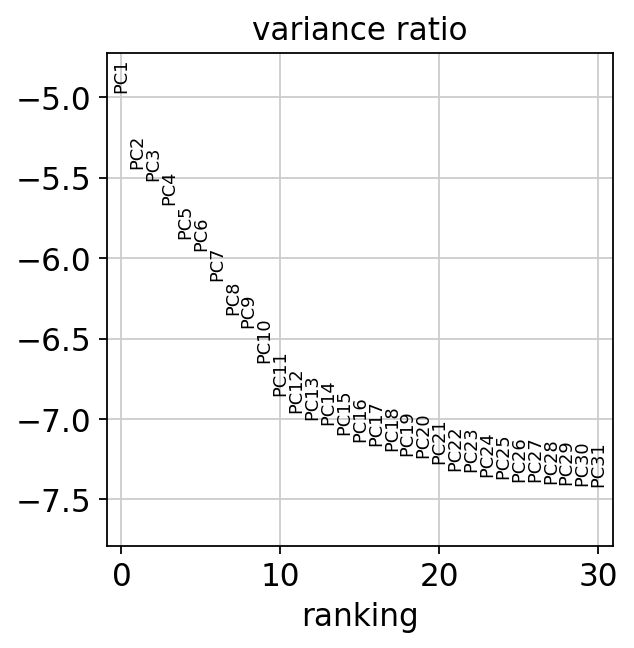

In [68]:
sc.pl.pca_variance_ratio(adata, log=True)

# Computing the neighborhood graph

PCA analysis was conducted using the “RunPCA” function of Seurat and PCs 1–12 were chosen for dimension reduction analysis with Seurat function “RunTSNE” and DiffusionMap analysis with Seurat function “RunDiffusion”.

In [69]:
sc.pp.neighbors(adata, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


# Embedding the neighborhood graph

In [70]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:24)


In [71]:
adata

AnnData object with n_obs × n_vars = 9713 × 5455
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Biological replicate_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

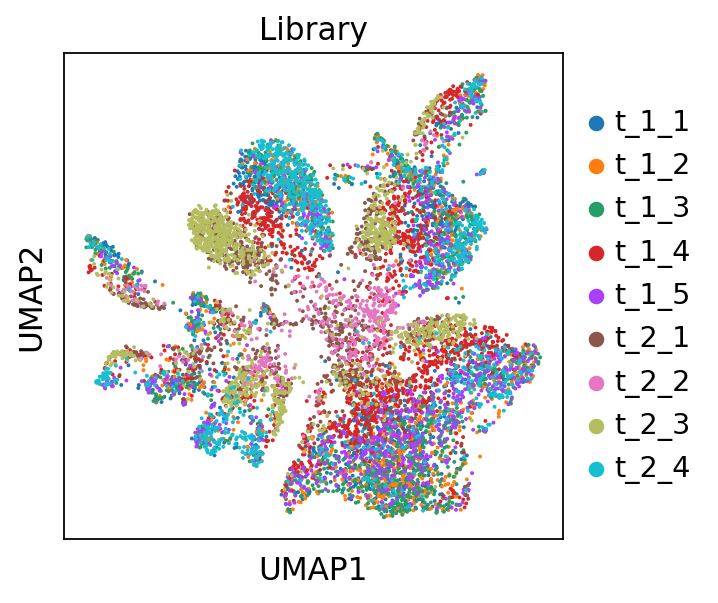

In [72]:
sc.pl.umap(adata, color=['Library'])

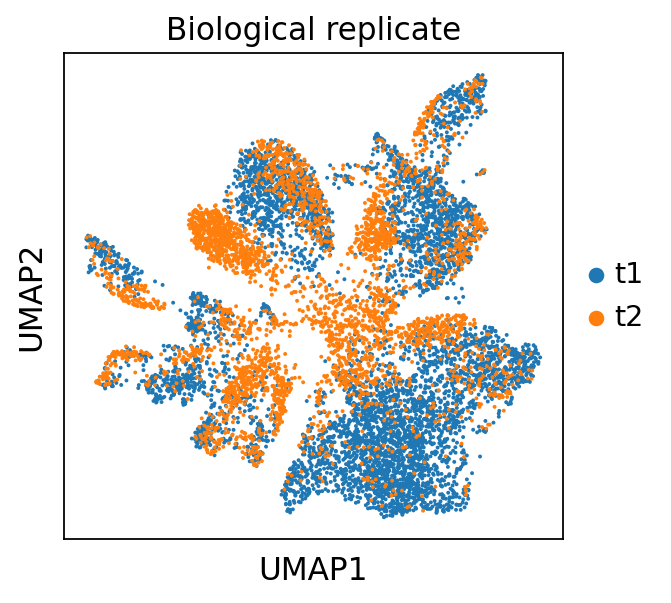

In [73]:
sc.pl.umap(adata, color='Biological replicate')

# Clustering the neighborhood graph



#### use leiden

In [74]:
sc.tl.leiden(adata, resolution = 0.2)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


#### plot using umap

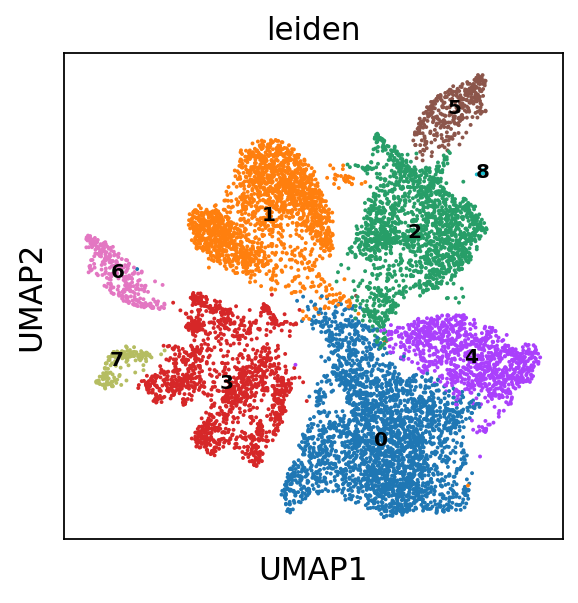

In [75]:
sc.pl.umap(adata, color=['leiden'],legend_loc='on data',legend_fontsize=9)

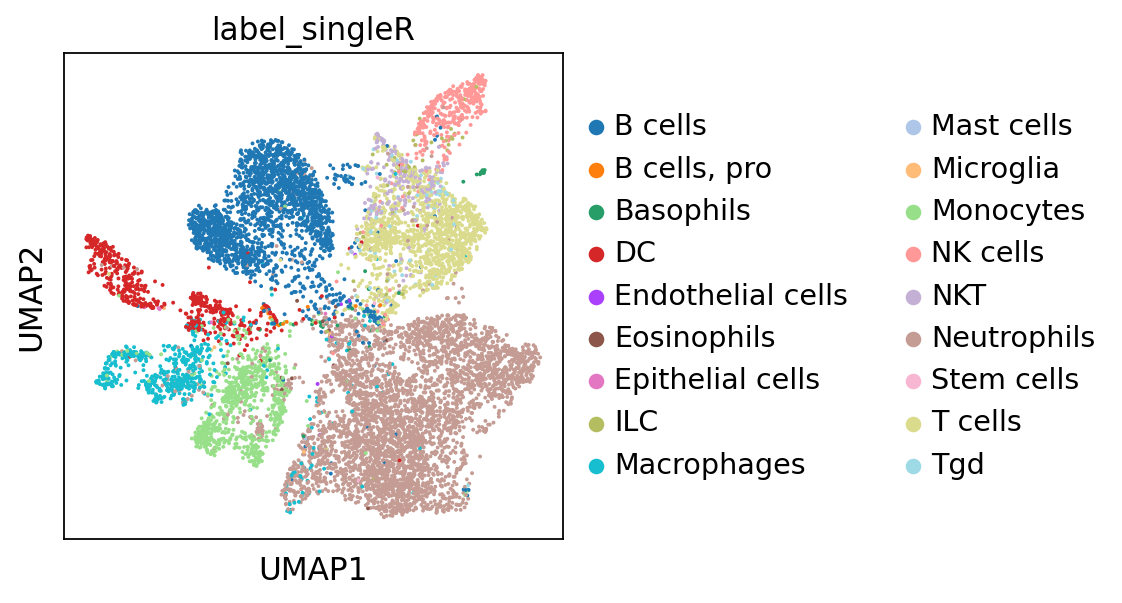

In [76]:
sc.pl.umap(adata, color=['label_singleR'])

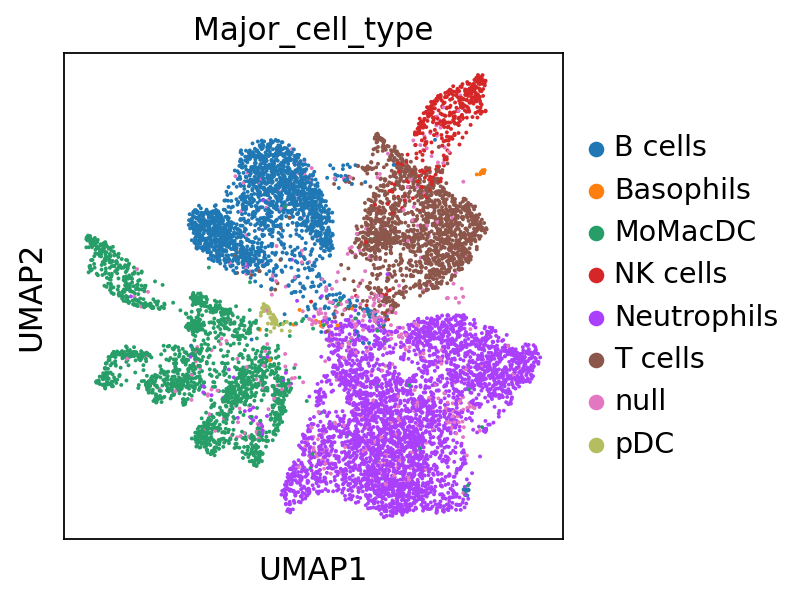

In [78]:
sc.pl.umap(adata, color=['Major_cell_type'])

In [80]:
adata.write(results_file)
#2022/3/24：含有singleR注释

In [4]:
adata=sc.read_h5ad(results_file)
adata

AnnData object with n_obs × n_vars = 9713 × 5455
    obs: 'batch_key', 'batch_key_raw', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR', 'louvain', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_key_colors', 'batch_key_raw_colors', 'hvg', 'label_singleR_colors', 'leiden', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Finding marker genes


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:31)


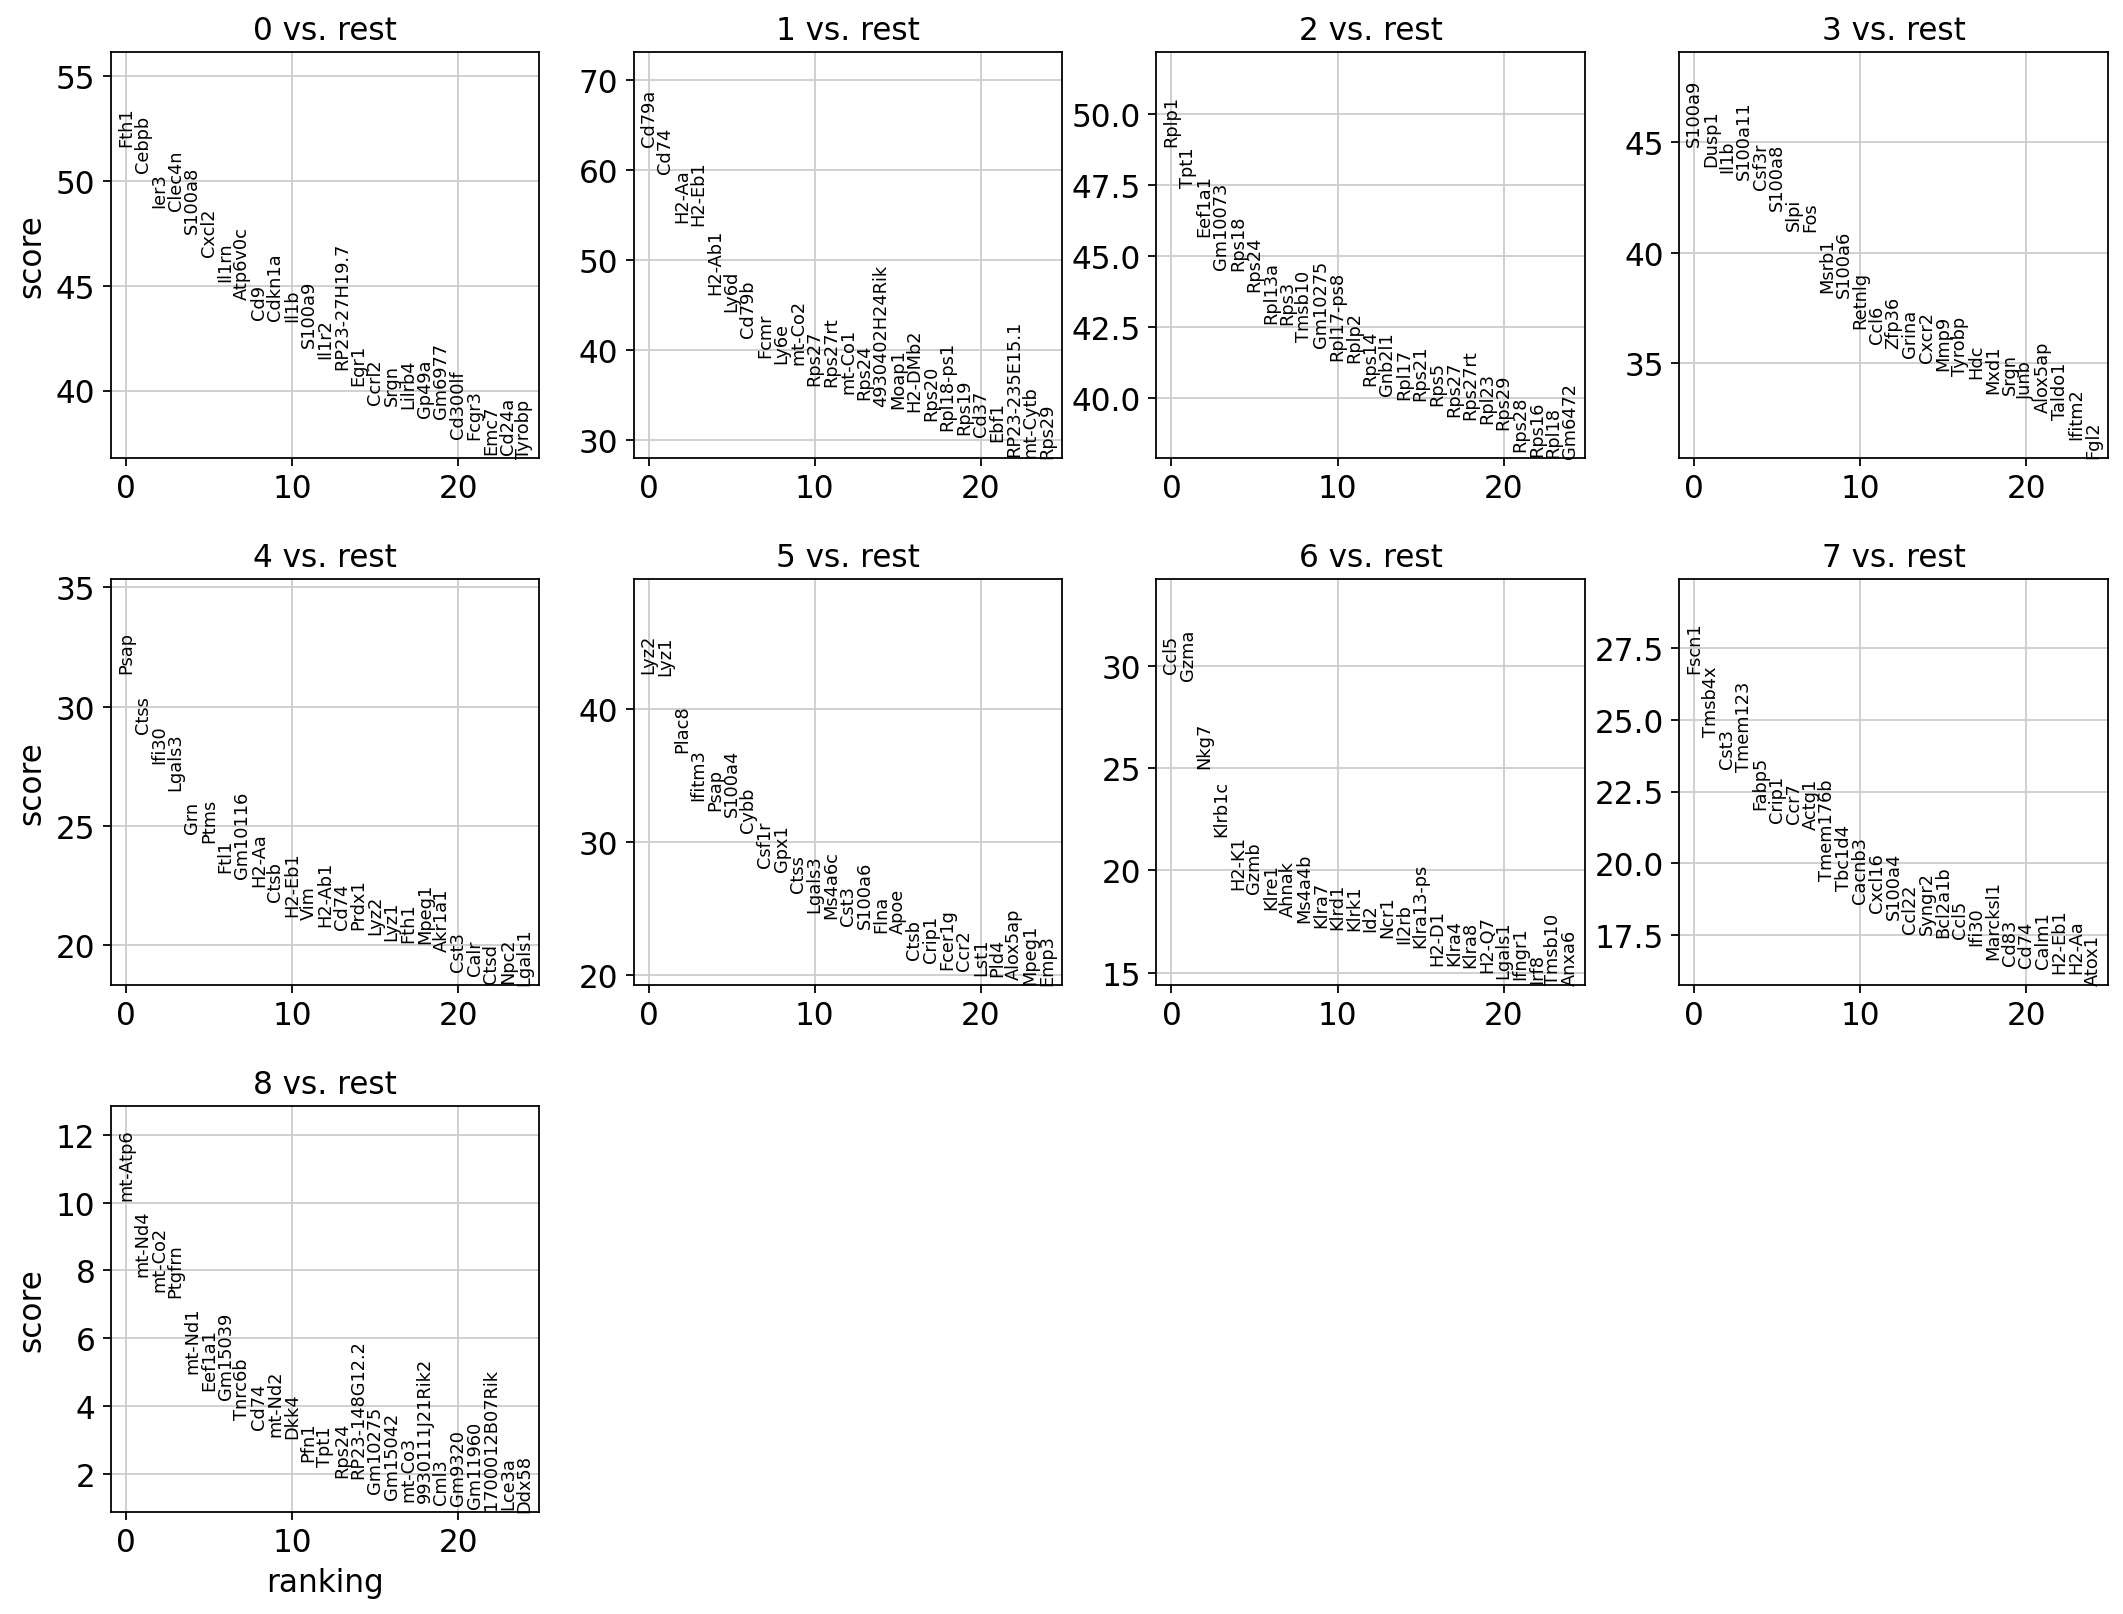

In [57]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# Identifying cell types

In [129]:
#import scanpy.api as sc
import matplotlib.pyplot as plt
import seaborn as sns
def get_cluster_proportions(adata,
                            cluster_key="cluster_final",
                            sample_key="replicate",
                            drop_values=None):
    """
    Input
    =====
    adata : AnnData object
    cluster_key : key of `adata.obs` storing cluster info
    sample_key : key of `adata.obs` storing sample/replicate info
    drop_values : list/iterable of possible values of `sample_key` that you don't want
    
    Returns
    =======
    pd.DataFrame with samples as the index and clusters as the columns and 0-100 floats
    as values
    """
    
    adata_tmp = adata.copy()
    sizes = adata_tmp.obs.groupby([cluster_key, sample_key]).size()
    props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index() 
    props = props.pivot(columns=sample_key, index=cluster_key).T
    props.index = props.index.droplevel(0)
    props.fillna(0, inplace=True)
    
    if drop_values is not None:
        for drop_value in drop_values:
            props.drop(drop_value, axis=0, inplace=True)
    return props

def plot_cluster_proportions(cluster_props, 
                             cluster_palette=None,
                             xlabel_rotation=0): 
    fig, ax = plt.subplots(dpi=300,figsize=(4,3))
    fig.patch.set_facecolor("white")
    
    cmap = None
    if cluster_palette is not None:
        cmap = sns.palettes.blend_palette(
            cluster_palette, 
            n_colors=len(cluster_palette), 
            as_cmap=True)
   
    cluster_props.plot(
        kind="bar", 
        stacked=True, 
        ax=ax, 
        legend=None, 
        colormap=cmap
    )
    
    ax.legend(bbox_to_anchor=(1.01, 1), frameon=False, title="Cluster",fontsize=6, title_fontsize=8)
    sns.despine(fig, ax)
    ax.tick_params(axis="x", rotation=xlabel_rotation)
    ax.set_xlabel(cluster_props.index.name.capitalize(),fontsize=10)
    ax.set_ylabel("Proportion",fontsize=10)
    fig.tight_layout()
    
    return fig

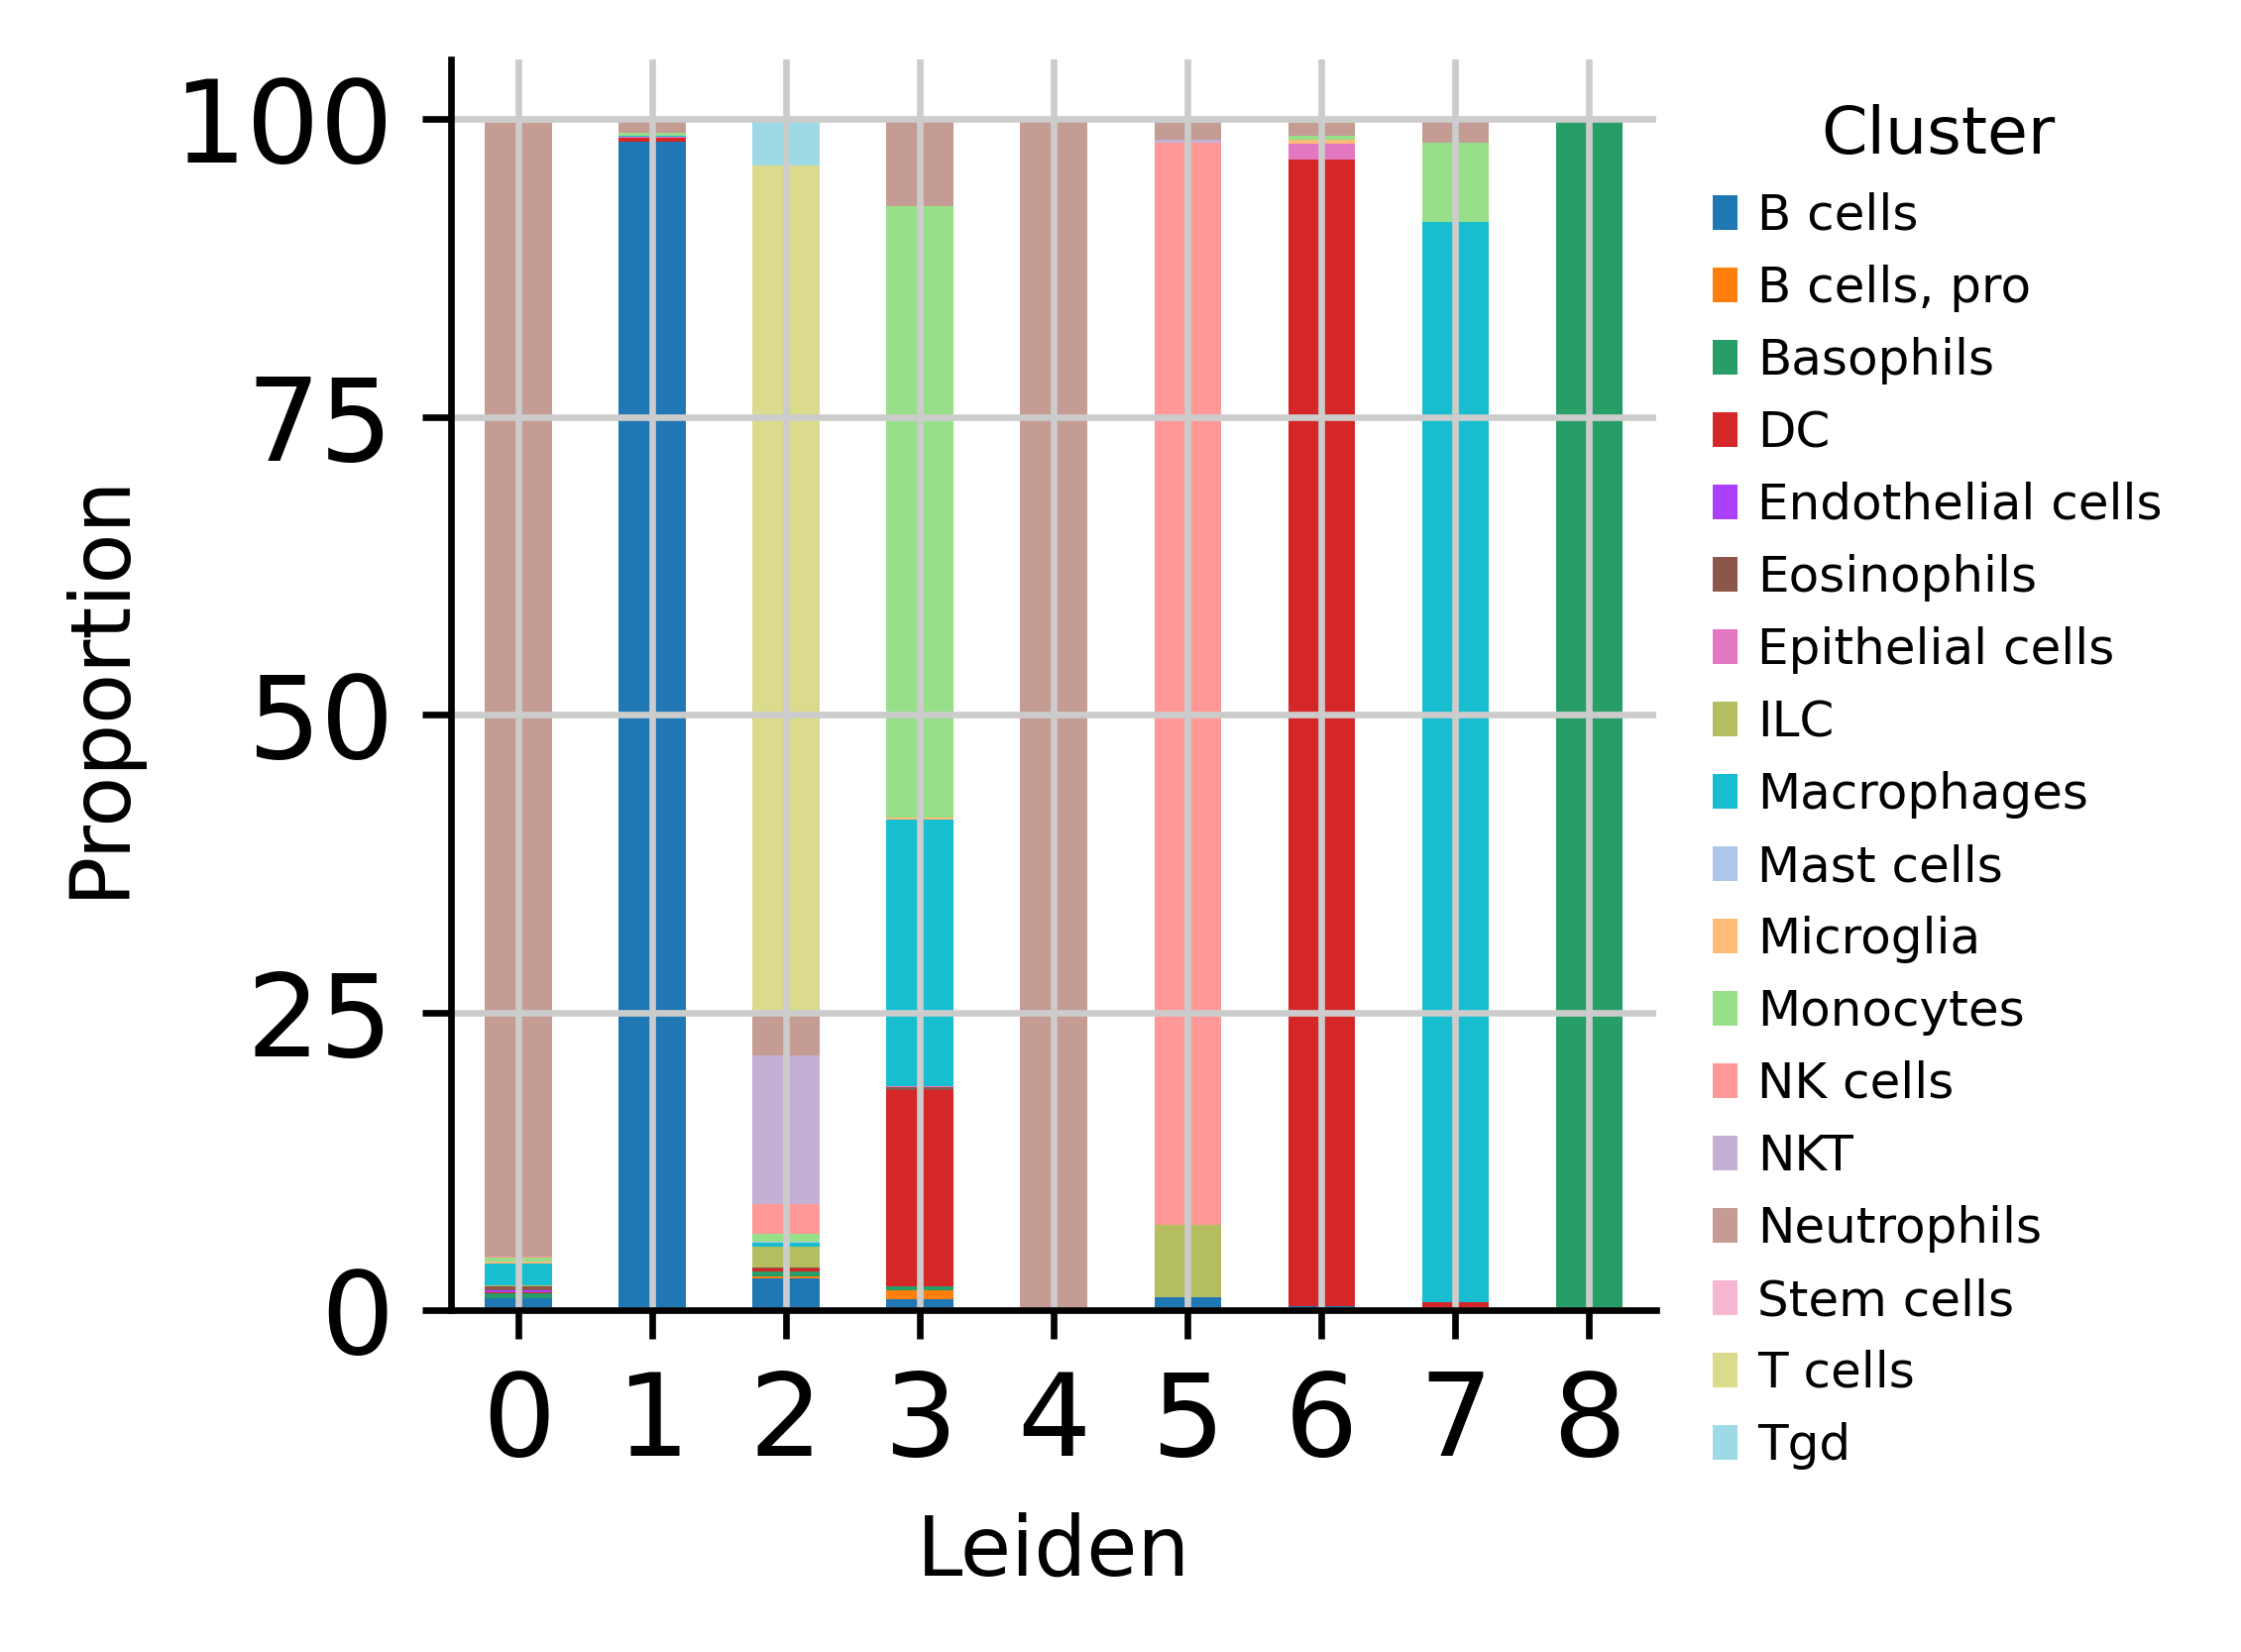

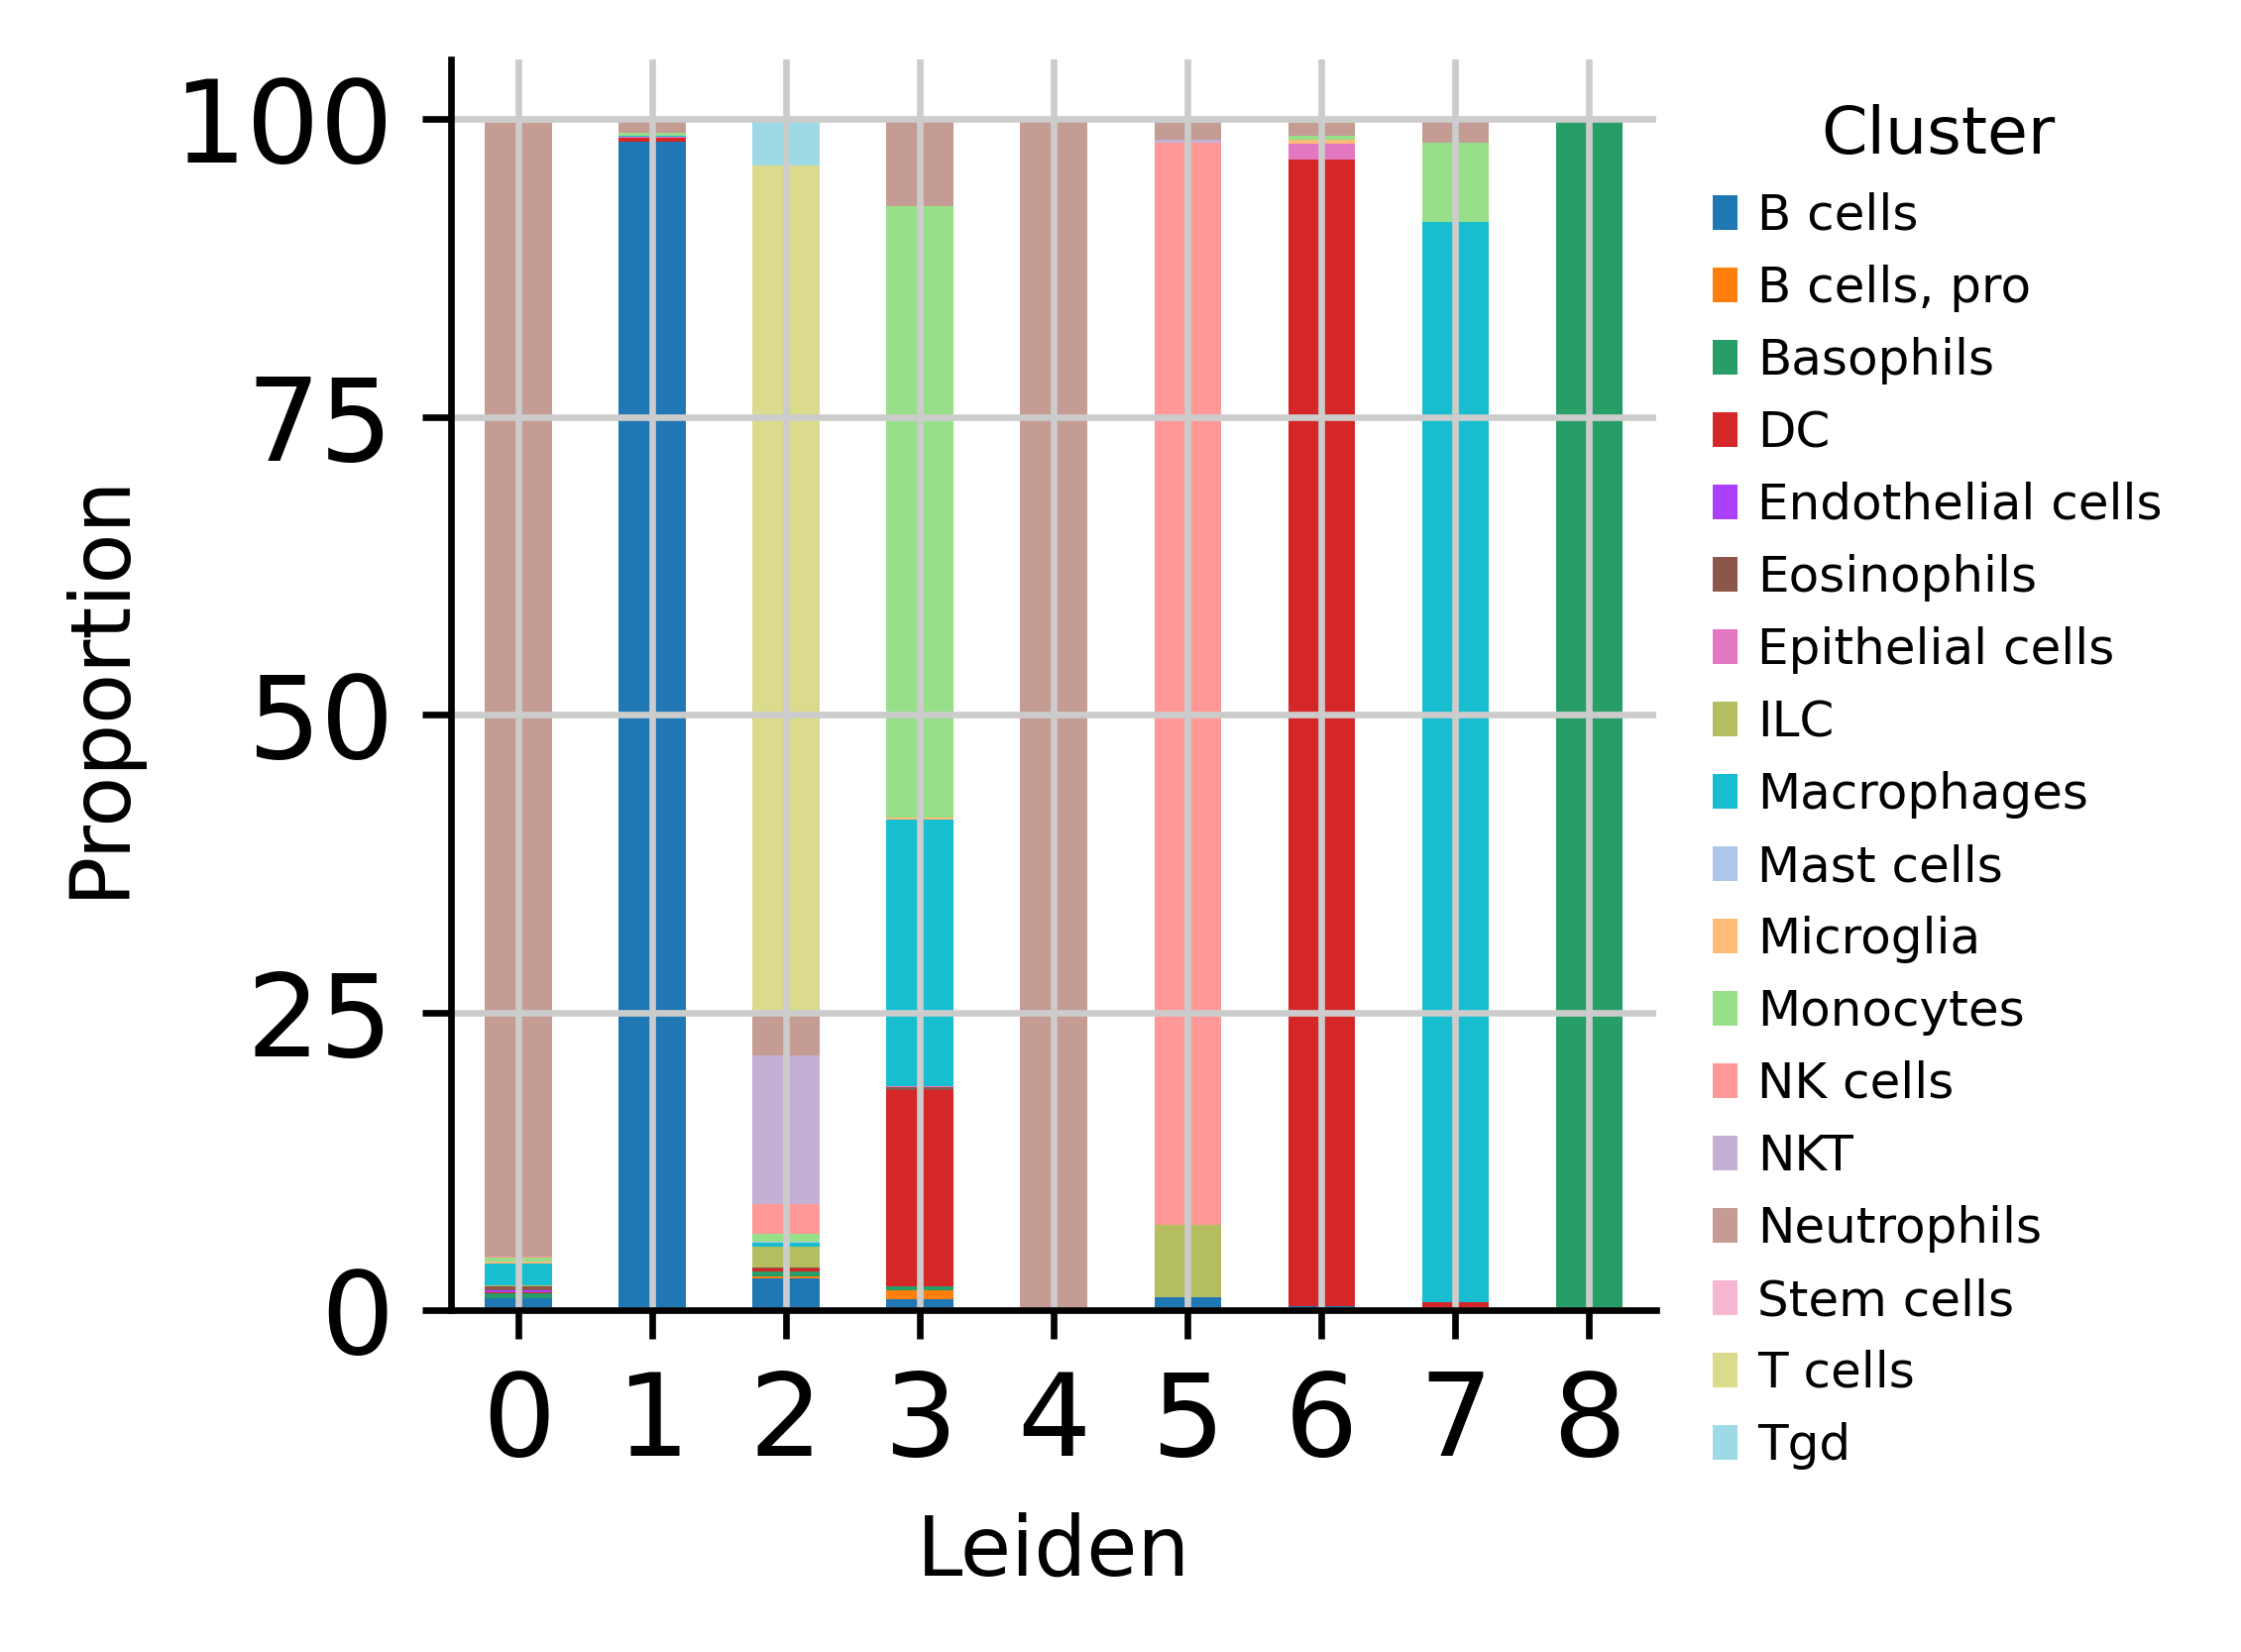

In [130]:
# leiden clusters - singleR annotation
cluster_props=get_cluster_proportions(adata, cluster_key='label_singleR',sample_key='leiden')
plot_cluster_proportions(cluster_props)

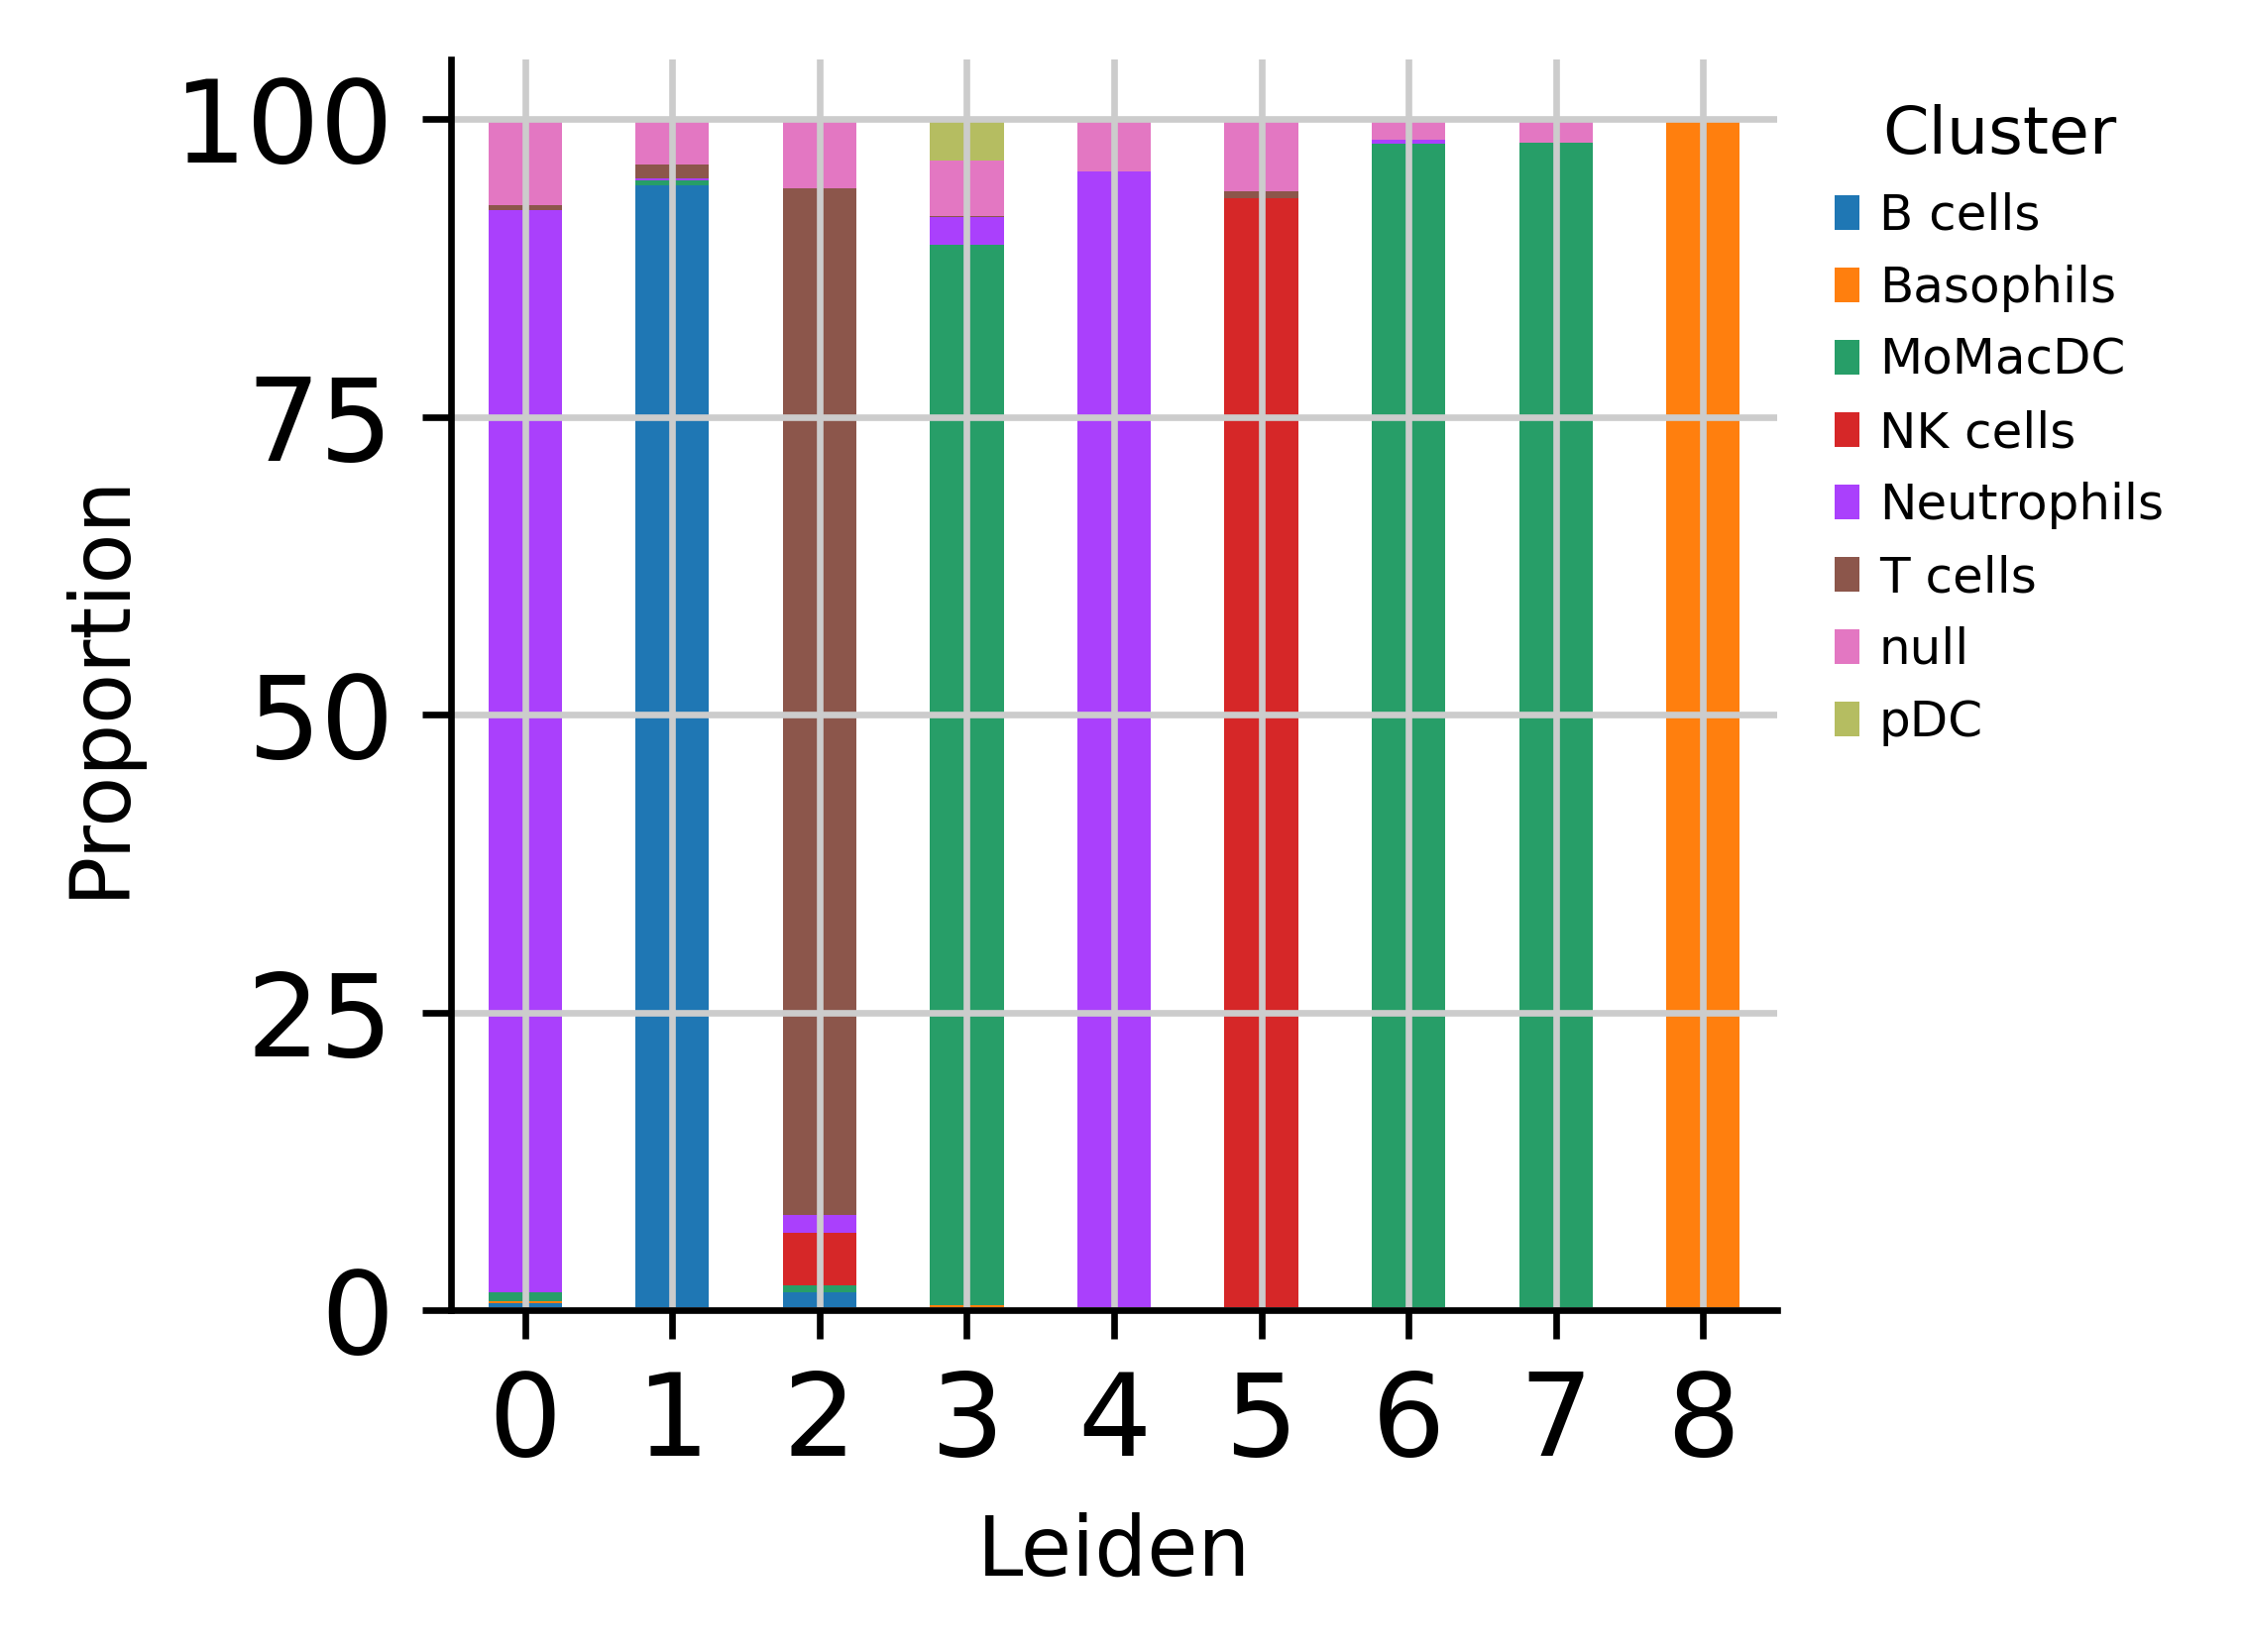

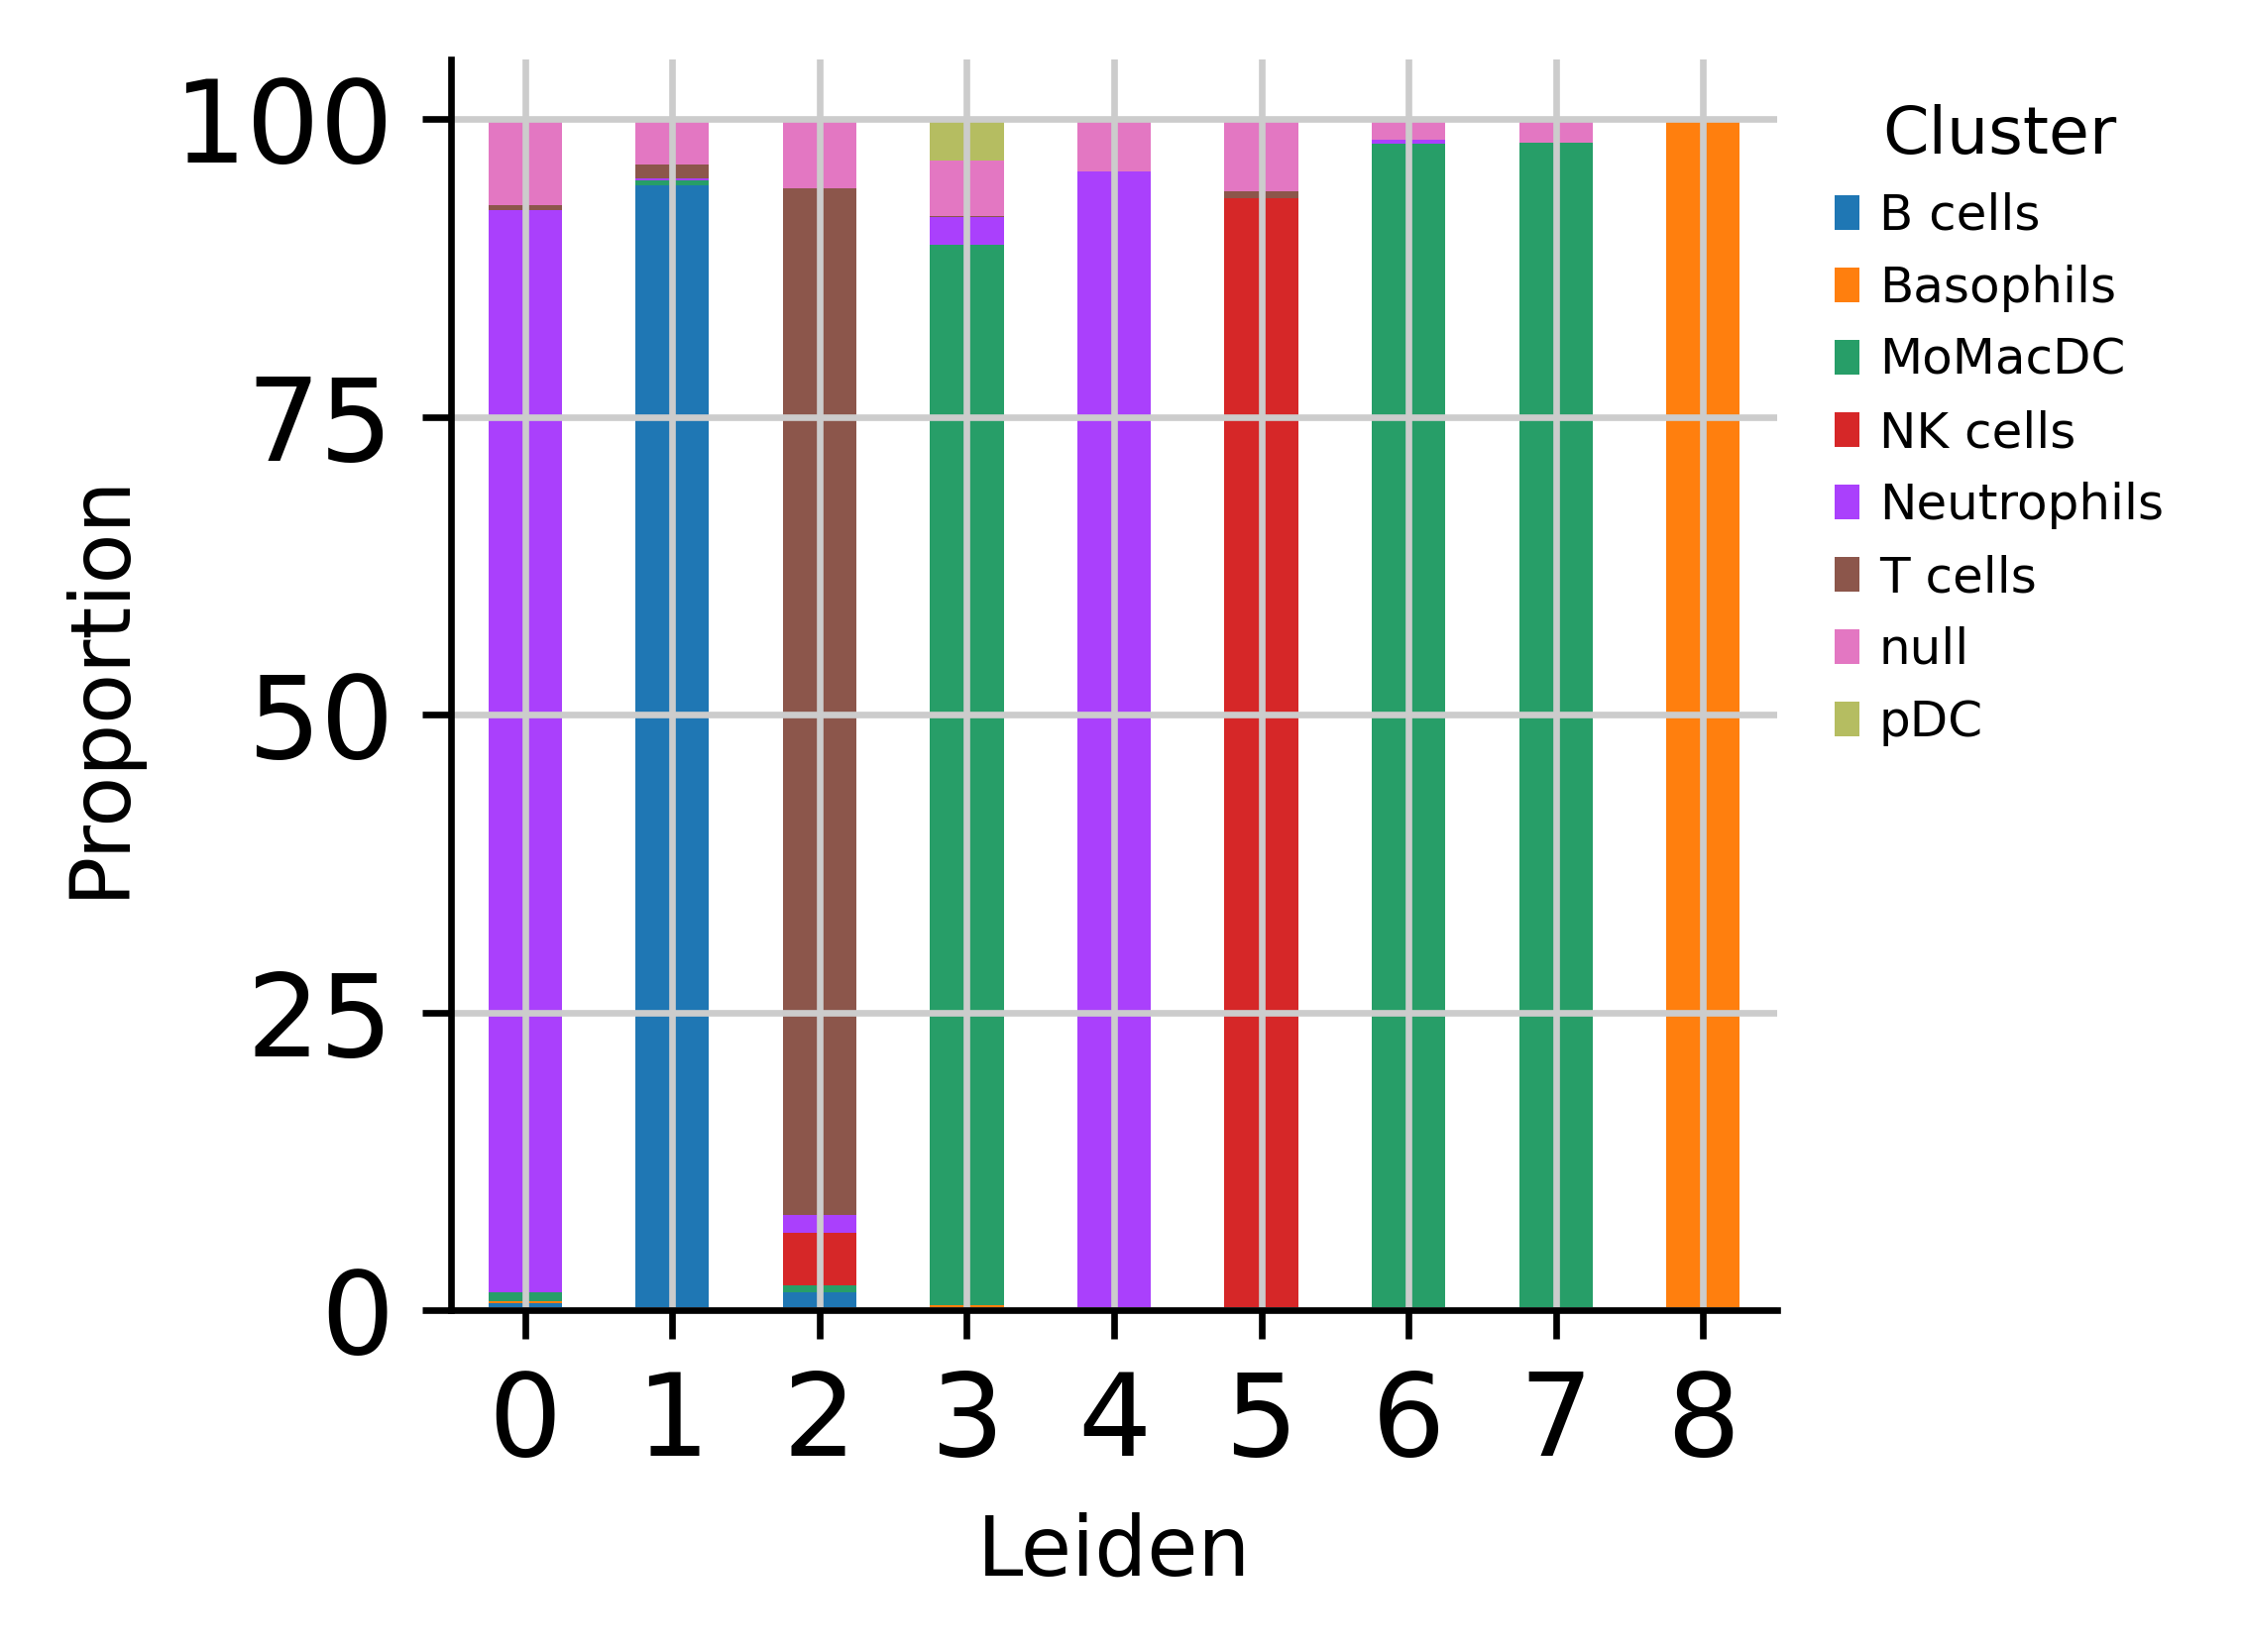

In [131]:
# leiden clusters - Major cell type annotation
cluster_props=get_cluster_proportions(adata, cluster_key='Major cell type',sample_key='leiden')
plot_cluster_proportions(cluster_props)

In [ ]:
adata=sc.read_h5ad(results_file)
adata

# dissecting the lymphoid cells

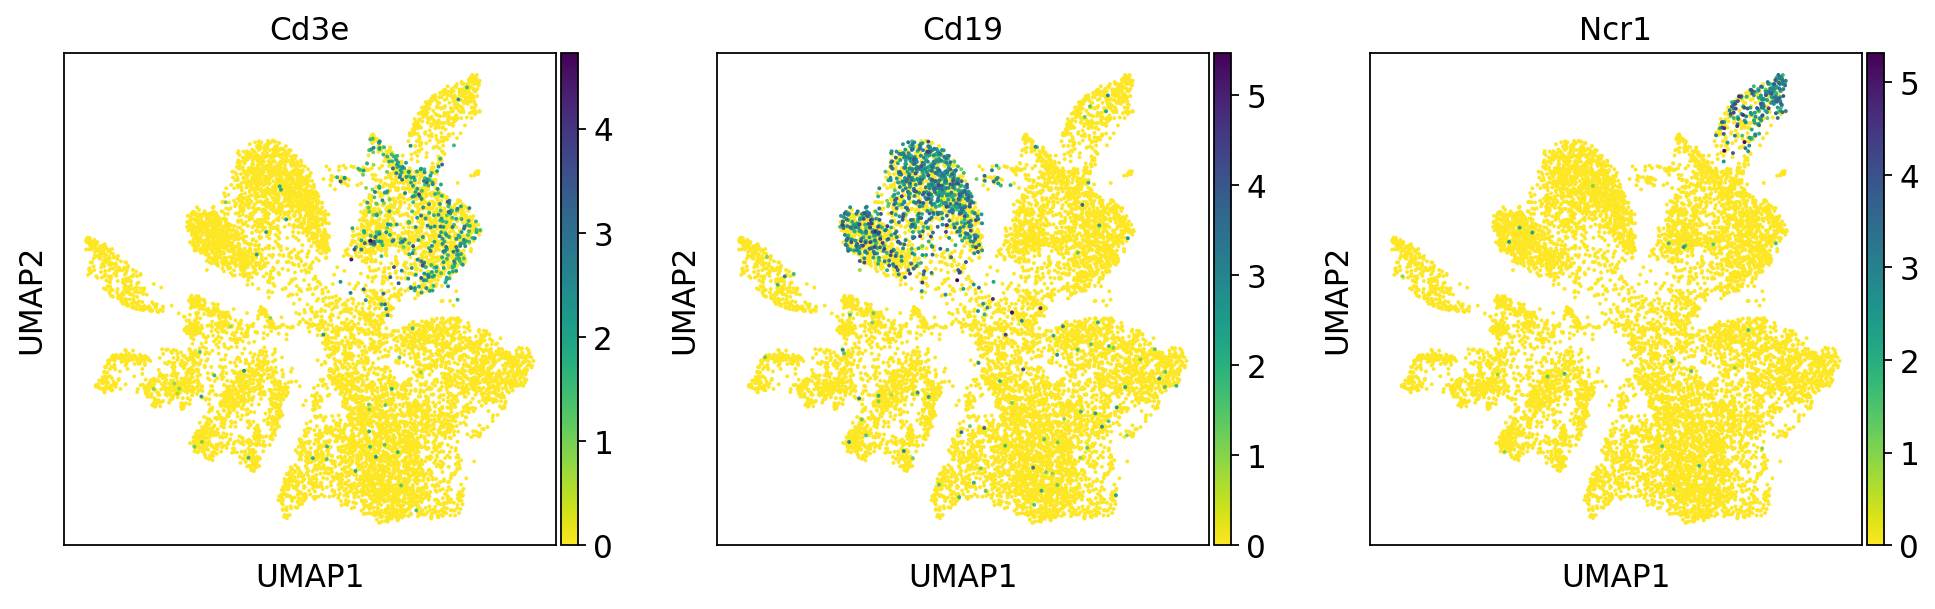

In [135]:
sc.pl.umap(adata, color=['Cd3e','Cd19','Ncr1'])

In [81]:
# create a dictionary to map cluster to lymphoid annotation label
cluster2annotation = {
     '0': 'n','1': 'y', '2': 'y','3': 'n', '4': 'n', '5': 'y', '6': 'n', '7': 'n', '8': 'n','10':'n','11':'n'
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['lymphoid'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [82]:
adata[adata.obs.lymphoid=='y'].write('write_LCA/m_LCA1-2_lymphoid.h5ad')

In [84]:
adata=sc.read_h5ad('write_LCA/m_LCA1-2_lymphoid.h5ad')
adata

AnnData object with n_obs × n_vars = 3966 × 5455
    obs: 'Barcode', 'Biological replicate', 'Library', 'Most_likely_Immgen_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR', 'leiden', 'lymphoid'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Biological replicate_colors', 'Library_colors', 'Major_cell_type_colors', 'hvg', 'label_singleR_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [85]:
# create a dictionary to map cluster to lymphoid cell type rough annotation label
cluster2label = {
     '1': 'm-B', '2': 'm-T','5': 'm-NK'
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['label_rough'] = adata.obs['leiden'].map(cluster2label).astype('category')

In [86]:
adata.obs['label_rough']

t_1_1-bc0020    m-T
t_1_1-bc0028    m-T
t_1_1-bc0031    m-T
t_1_1-bc0066    m-T
t_1_1-bc0068    m-T
               ... 
t_2_4-bc1077    m-T
t_2_4-bc1079    m-B
t_2_4-bc1083    m-T
t_2_4-bc1084    m-B
t_2_4-bc1088    m-B
Name: label_rough, Length: 3966, dtype: category
Categories (3, object): ['m-B', 'm-T', 'm-NK']

In [ ]:
adata.write('write_LCA/m_LCA1-2_lymphoid.h5ad')